<a href="https://colab.research.google.com/github/simionattovini/hydraulic-machines/blob/main/Test%20Solutions/MHA_PO_1S2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máquinas Hidráulicas A - PO - 1S2024

##Enunciado

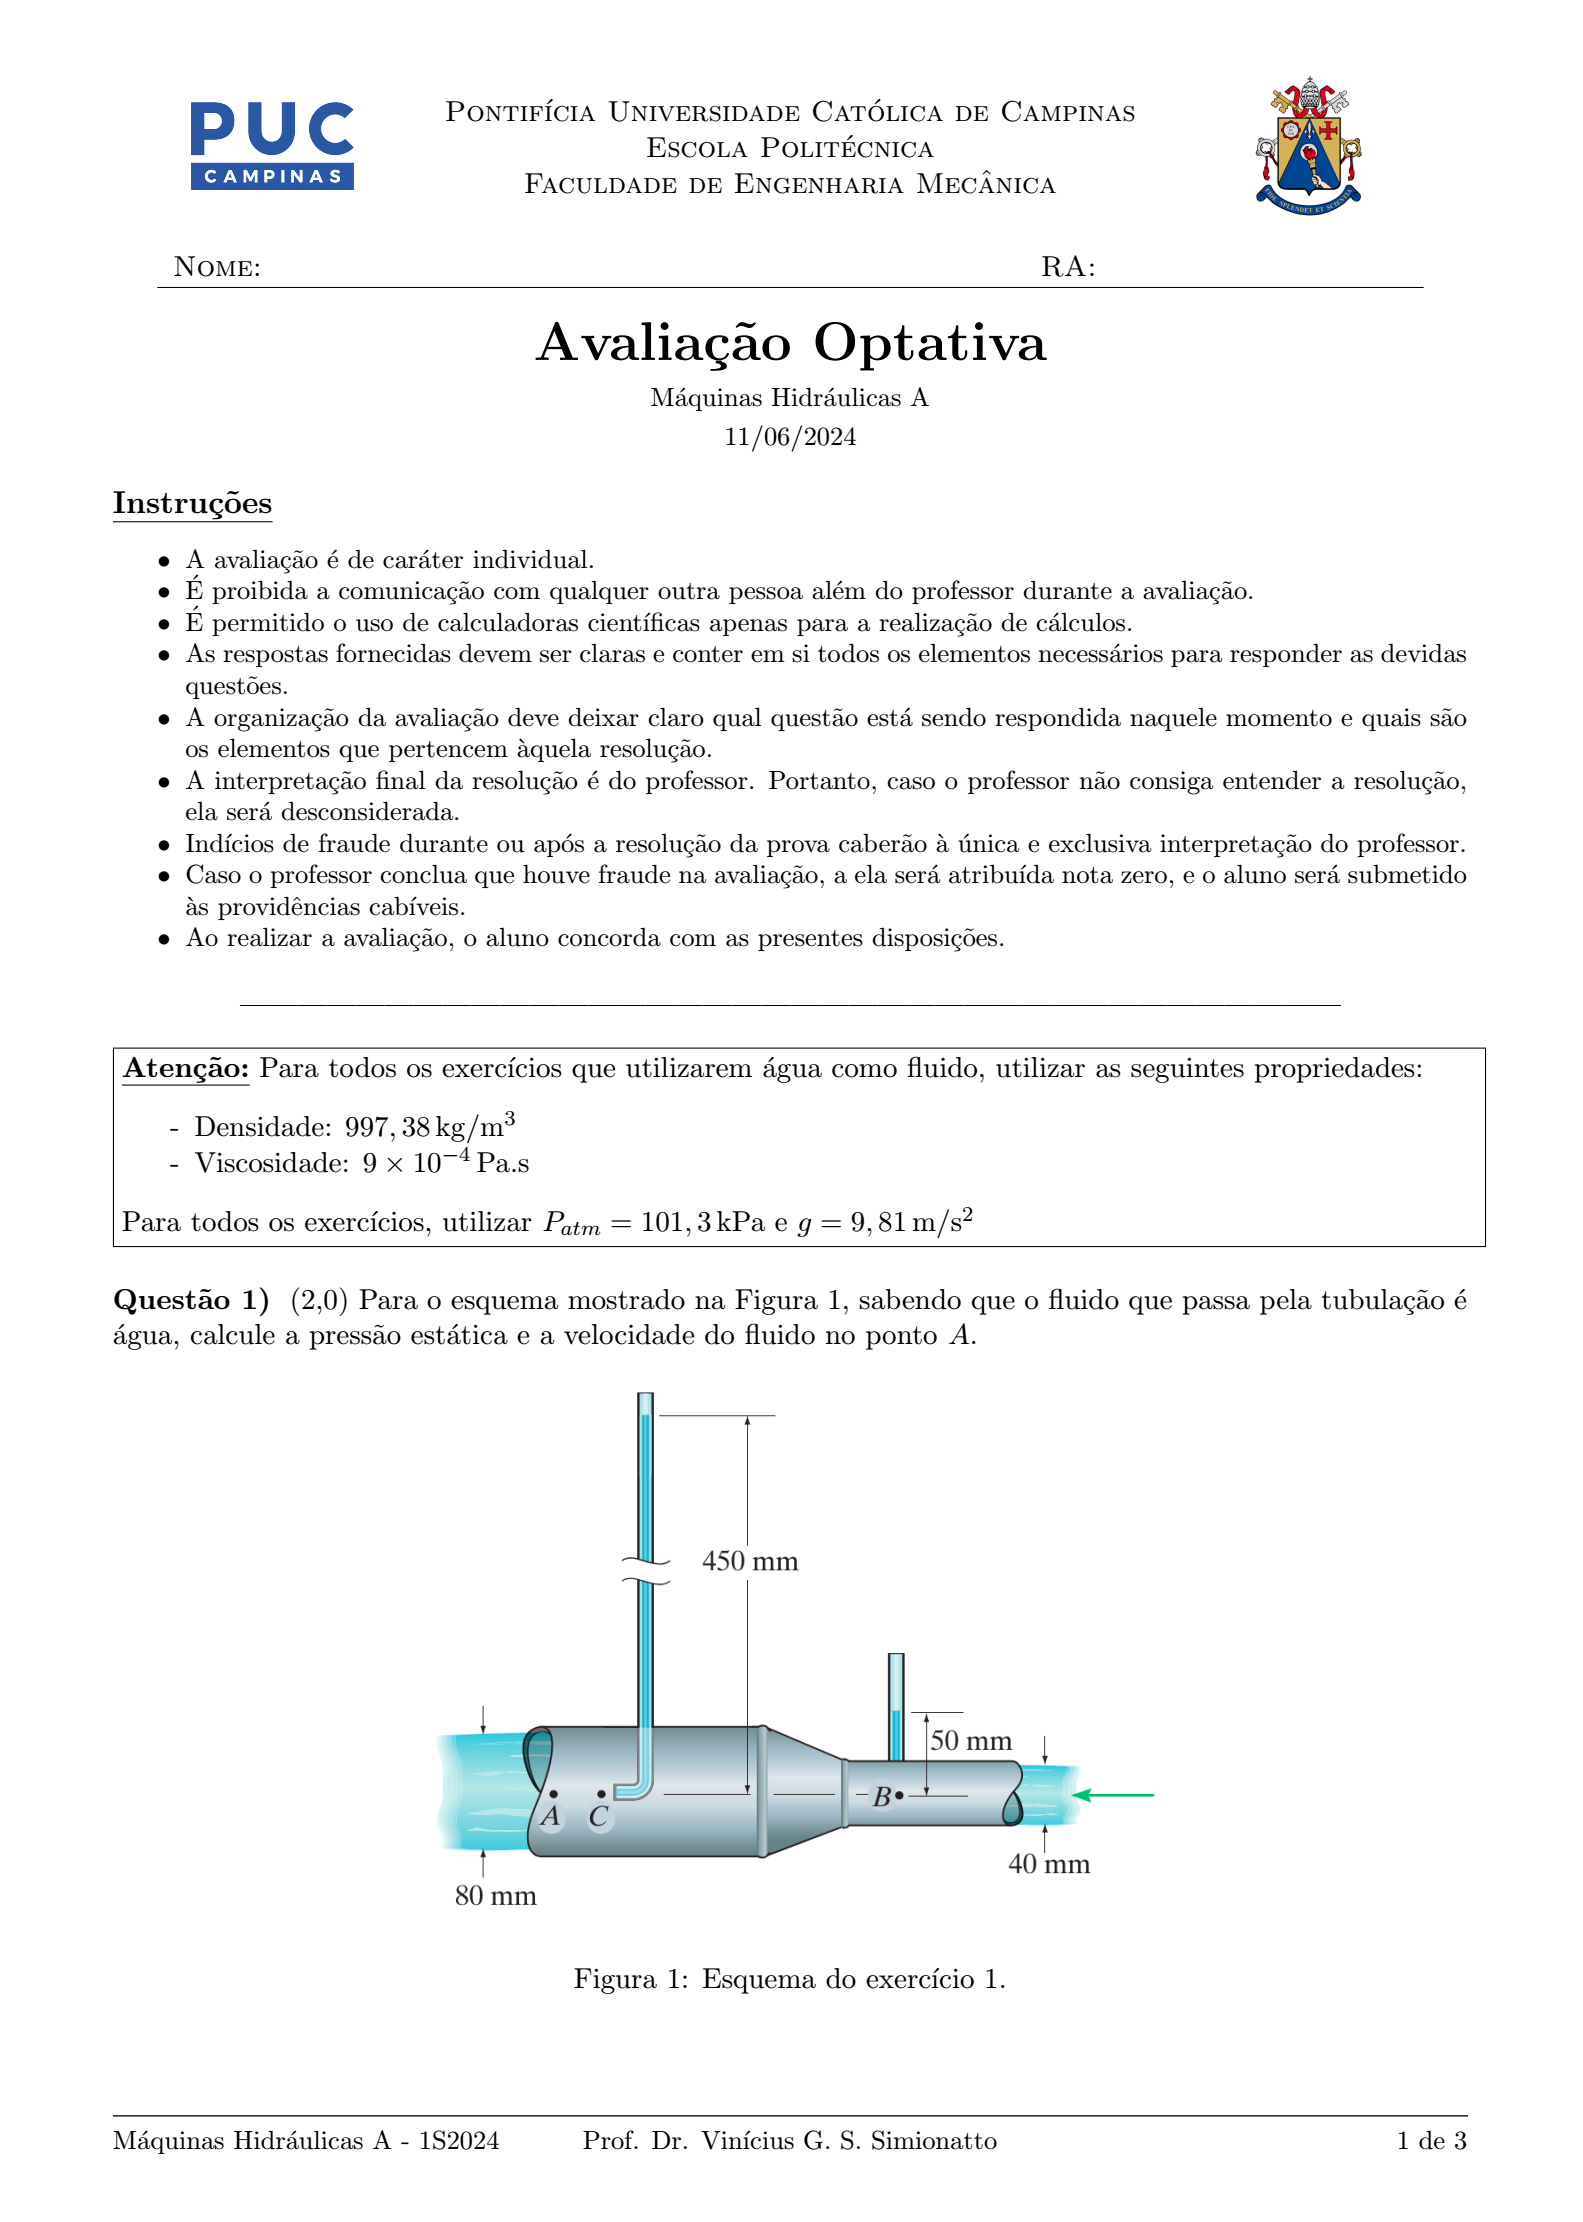

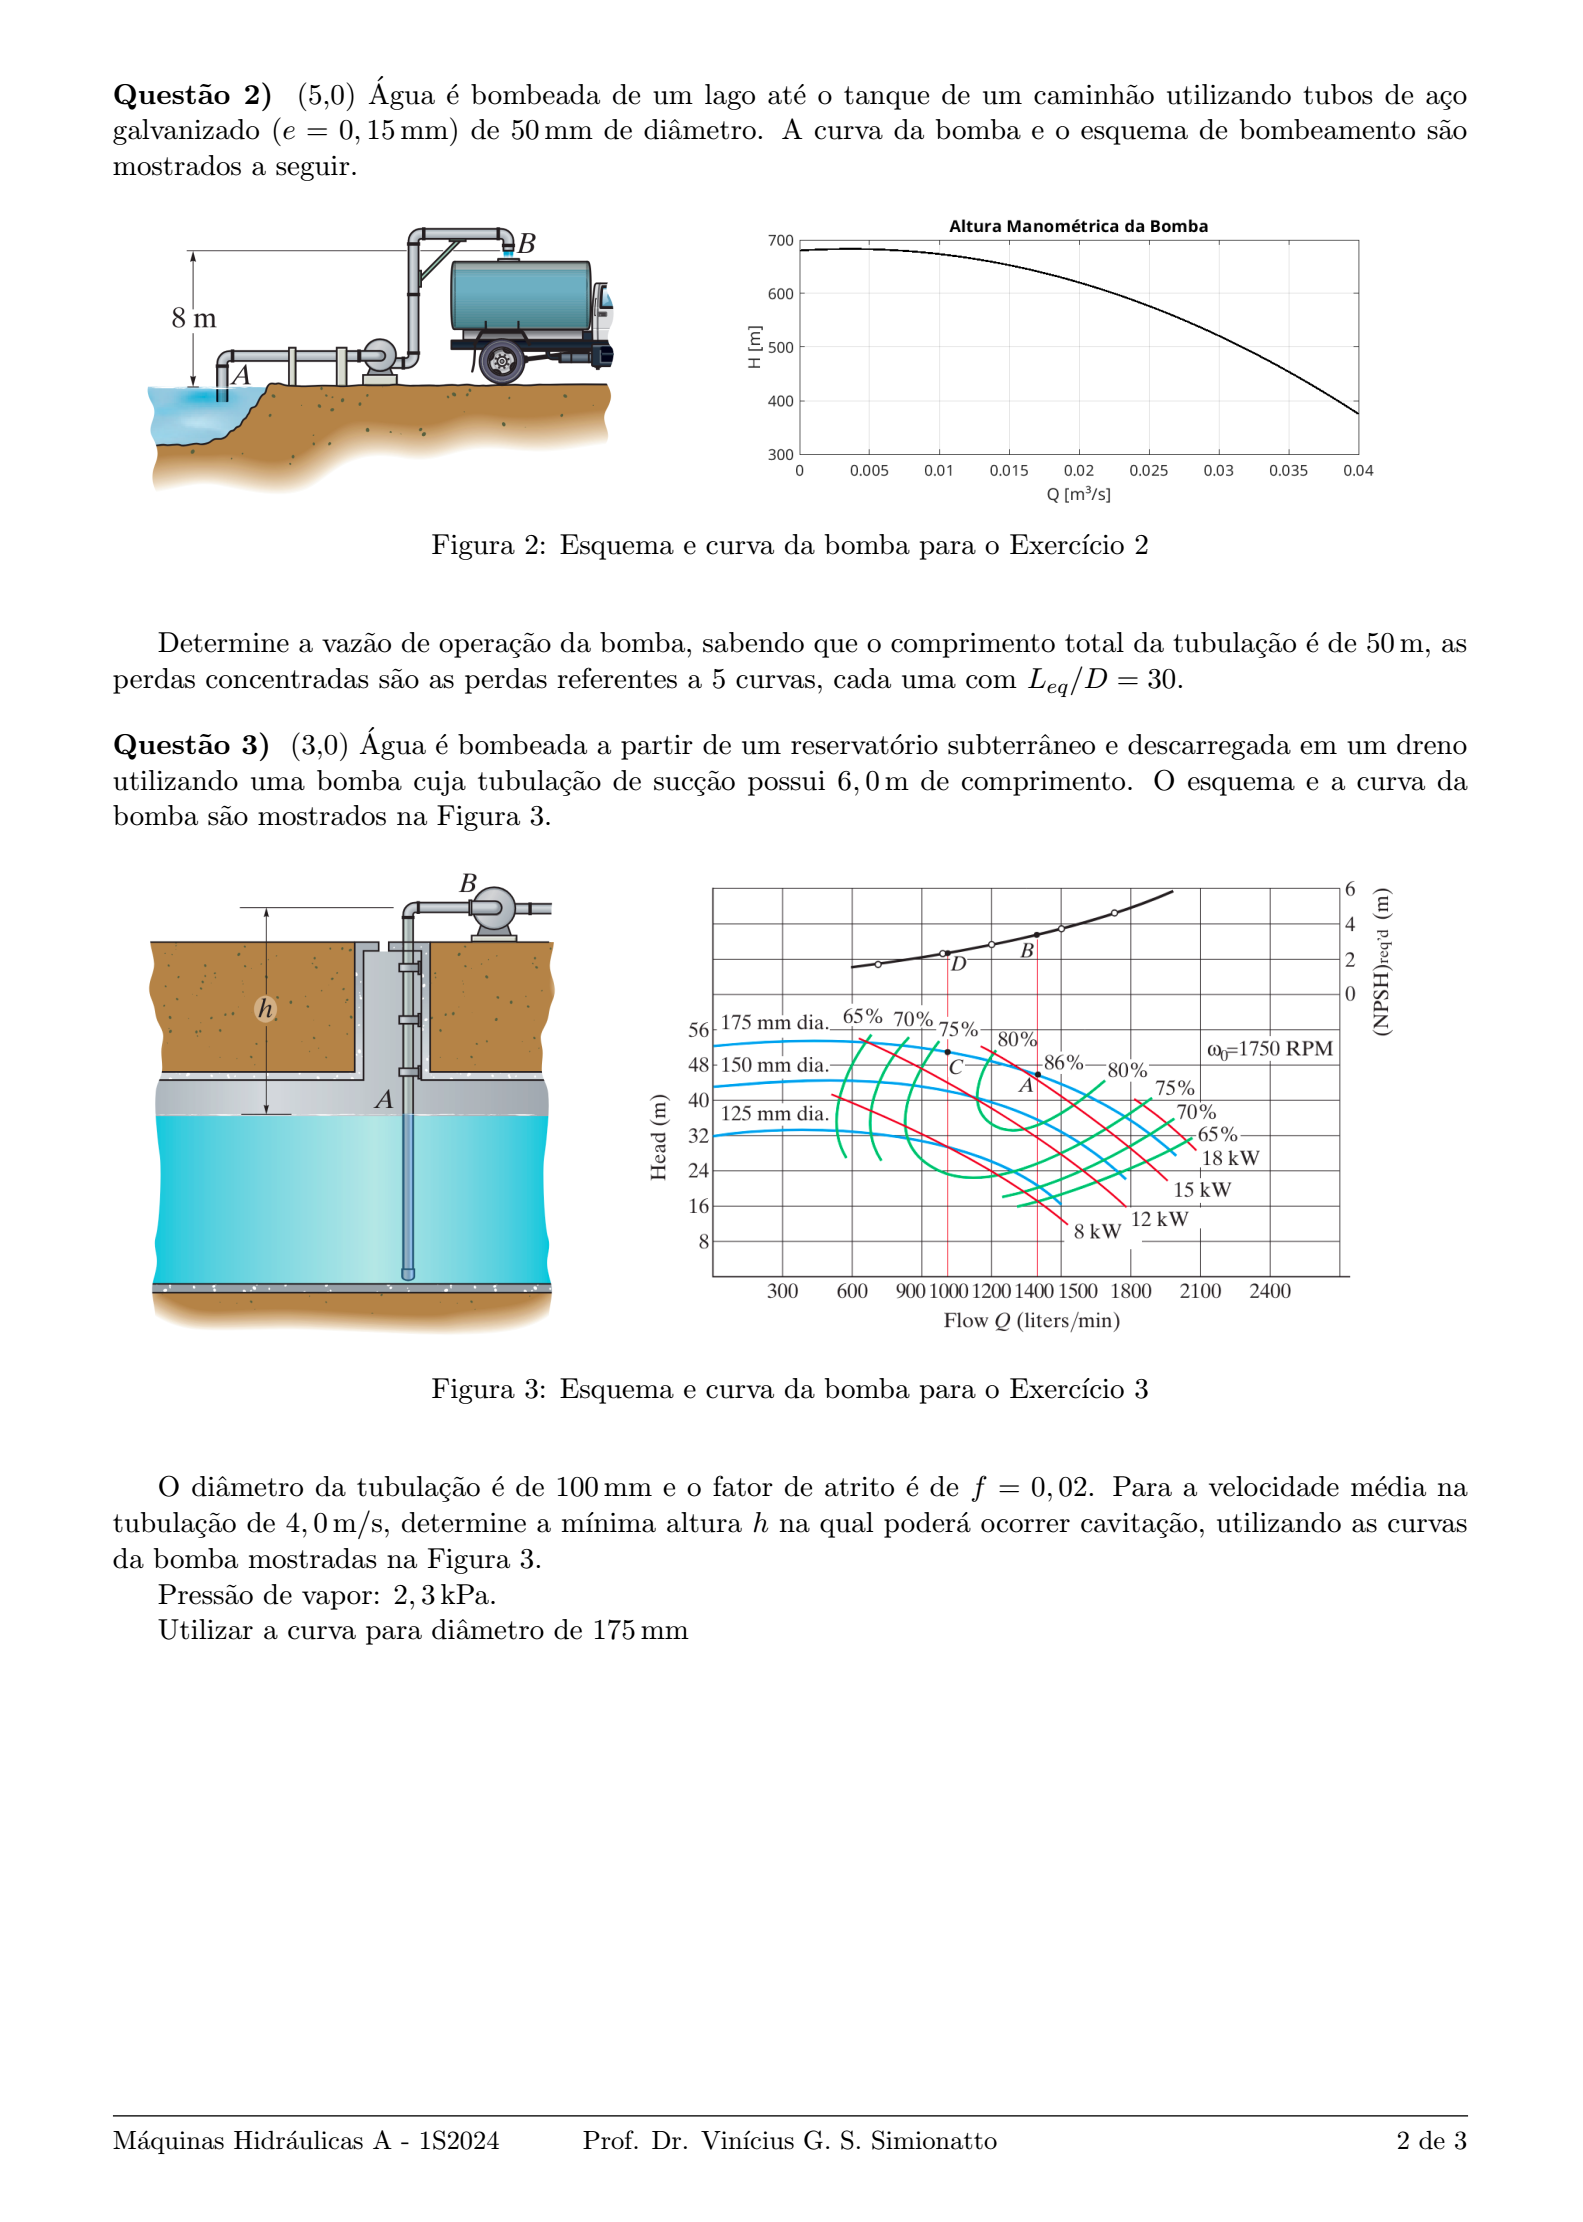

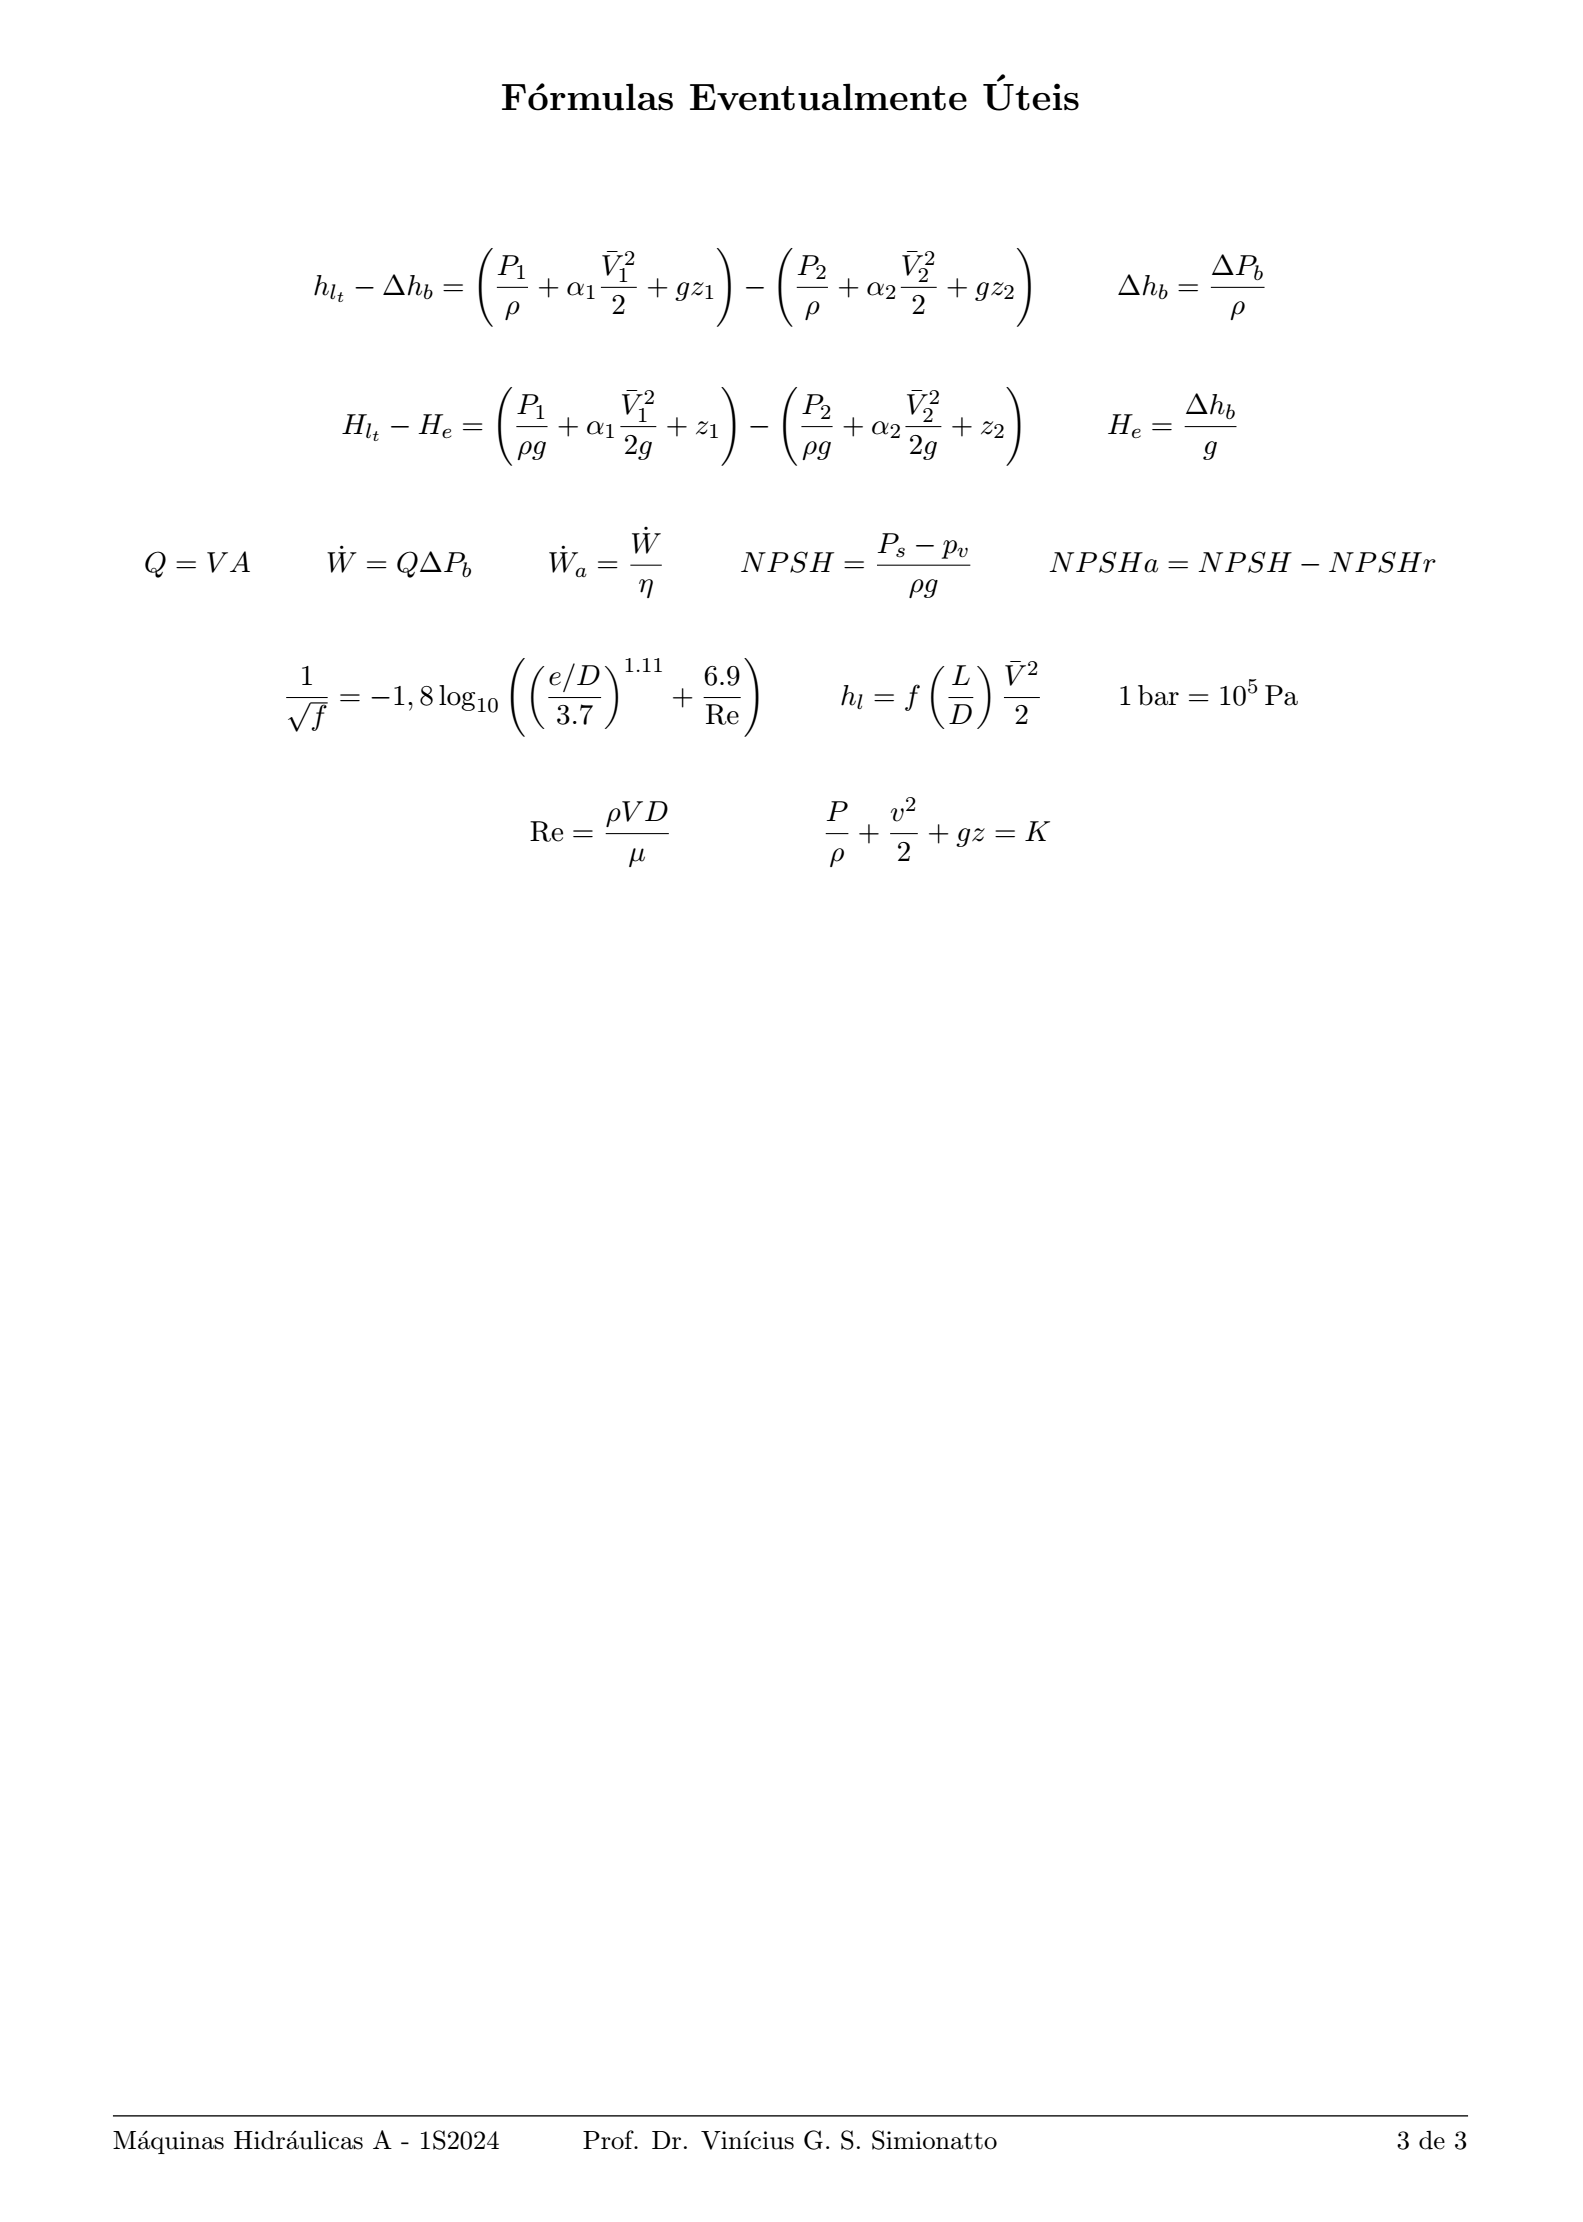

##Resolução

### Questão 1)

Para resolver esta questão pode-se, primeiramente aplicar a equação de Bernoulli entre os pontos A e C, sabendo que no ponto C haverá estagnação. A equação é:

$$
\frac{P_A}{\rho} + \frac{v_A^2}{2} + g z_A = \frac{P_C}{\rho} + \frac{v_C^2}{2} + g z_C
$$

Sabemos que $z_A = z_C$ e $v_C = 0$. Por isso a equação fica:

$$
P_A + \rho \frac{v_A^2}{2} = P_C
$$

No exercício o manômetro informa a leitura da altura de $450\,\mathrm{mm}$ de coluna d'água. Assim, a pressão manométrica naquele ponto é:

$$
P_C = \rho g \cdot 0,45\,\mathrm{m}
$$

O valor é mostrado a seguir:

In [ ]:
rho = 997.38  # kg/m³
g = 9.81      # m/s²

Pc = rho*g*0.45

print(f'Pc = {Pc:.2f} Pa')

Pc = 4402.93 Pa


Realizando a análise com a equação de Bernoulli, agora, entre os pontos A e B, a equação se torna:

$$
P_A + \rho \frac{v_A^2}{2} = P_B + \rho \frac{v_B^2}{2}
$$

Aplicando o princípio da conservação da massa e a incompressibilidade do fluido, encontra-se a relação:

$$
Q = v_A A_A = v_B A_B = v_A \frac{\pi D_A^2}{4} = v_B \frac{\pi D_B^2}{4}
$$

Portanto:
$$
v_B = v_A \frac{D_A^2}{D_B^2} = 4v_A
$$

Além disso, $P_B$ é dada pela altura de $50 \,\mathrm{mm}$ informada no manômetro em $B$. Assim:

In [ ]:
Pb = rho*g*0.05

print(f'Pb = {Pb:.2f} Pa')

Pb = 489.21 Pa


Utilizando todas as relações, temos:

$$
P_A + \rho \frac{v_A^2}{2} = P_C = P_B + \rho \frac{16 v_A^2}{2}
$$

Assim:

$$
v_A = \sqrt{\frac{P_C-P_B}{8\rho}}
$$

Além disso:

$$
P_A = P_C - \frac{\rho}{2}\left(\frac{P_C-P_B}{8\rho}\right) = \frac{15P_C+P_B}{16}
$$

Os valores se encontram a seguir:

In [ ]:
from numpy import sqrt

va = sqrt((Pc-Pb)/(8*rho))

Pa = (15*Pc+Pb)/16

print(f'va = {va:.2f} m/s')
print(f'Pa = {Pa:.2f} Pa')

va = 0.70 m/s
Pa = 4158.33 Pa


### Questão 2)

Aplica-se a equação da perda de carga entre A e B:

$$
H_{lt} - H_e = \left(\frac{P_A}{\rho g} + \alpha_A \frac{\bar{V}_A^2}{2g} + z_A\right) - \left(\frac{P_B}{\rho g} + \alpha_B \frac{\bar{V}_B^2}{2g} + z_B\right)
$$

Pela figura, temos:

*   $P_A = P_B = P_{atm}$
*   $\bar{V}_A = 0\,\mathrm{m/s}$ : hipótese de grande reservatório
*   $\bar{V}_B = Q/A = 4Q/\pi D^2$
*   $z_A = 0\,\mathrm{m}$ : nível do reservatório de sucção tomado como referência
*   $z_B = 8\,\mathrm{m}$

Assim, a equação se reduz a:

$$
H_{lt} - H_e = -\alpha_B \frac{8Q^2}{\pi^2 D^4 g} - z_B
$$

Assim:

$$
H_e = \alpha_B \frac{8Q^2}{\pi^2 D^4 g} + z_B + H_{lt}
$$

As perdas de carga são dadas por:
$$
H_{lt} = \underbrace{f\left(\frac{50}{0.05}\right)\left(\frac{8Q^2}{\pi^2 D^4g}\right)}_{\mathrm{Tubulação}}+ 5\times\underbrace{f\left(30\right)\left(\frac{8Q^2}{\pi^2 D^4g}\right)}_{\mathrm{Curvas}} = \left(\frac{9200f}{\pi^2D^4g}\right) Q^2
$$

Portanto a altura manométrica requerida da bomba é dada por:
$$
H_e = \left(\frac{9200f+8}{\pi^2D^4g}\right) Q^2 + z_B
$$

O valor de $\alpha_B$ foi aproximado para 1 pois supõe-se que o sistema trabalhe em fluxo turbulento. Para provar este ponto, podemos calcular a vazão mínima na qual o sistema estará em regime turbulento. Por segurança, assumiremos que o menor valor admissível para o número de Reynolds nestas condições é de 10.000. Assim, temos:

In [ ]:
%reset -f

from numpy import pi

rho = 997.38   # kg/m³
D = 0.05       # m
g = 9.81       # m/s²
zb = H = 8     # m
L = 50         # m
e = 0.15e-3    # m
u = 9e-4       # Pa.s
Patm = 101300  # Pa

A = pi*(D**2)/4

Re_min = 10000

Vmin = u*Re_min/(rho*D)

Qmin = Vmin*A

print(f'Q_min = {Qmin:.6f} m³/s')

Q_min = 0.000354 m³/s


Portanto, para vazões acima deste valor o fluxo será turbulento, e assim $\alpha_A = \alpha_B = 1$.

Agora podemos calcular o valor da altura manométrica requerida pelo sistema ($H_e$) para diversos valores de Q.

In [ ]:
from numpy import log10

def reynolds(rho, Q, D, u):
  A = pi*(D**2)/4
  V = Q/A
  return rho*V*D/u

def f_haaland(e, D, Re):
  return (-1.8*log10(((e/D)/3.7)**1.11 +6.9/Re))**-2

Qv = [Qmin]
Qv.extend([el*0.005 for el in range(1, 9)])

for Qx in Qv:
  Re_x = reynolds(rho, Qx, D, u)
  fx = f_haaland(e, D, Re_x)
  Hex = ((9200*fx+8)/((pi**2)*(D**4)*g))*(Qx**2)
  print(f'He({Qx:.4f} m³/s) = {Hex:.2f} m')

He(0.0004 m³/s) = 0.07 m
He(0.0050 m³/s) = 10.62 m
He(0.0100 m³/s) = 41.83 m
He(0.0150 m³/s) = 93.64 m
He(0.0200 m³/s) = 166.04 m
He(0.0250 m³/s) = 259.03 m
He(0.0300 m³/s) = 372.61 m
He(0.0350 m³/s) = 506.79 m
He(0.0400 m³/s) = 661.55 m


Comparando os dados com o gráfico, o cruzamento de $H_e$ com a curva da bomba ocorre para $0.03 < Q < 0.035 \,\mathrm{m³/s}$. Assim, com os dados e o gráfico podemos construir a seguinte tabela:

$$
\begin{array}{ccc}
Q \,\mathrm{[m^3/s]} & H_e \,\mathrm{(sis.)\,[m]} & H_e \,\mathrm{(bomba)\,[m]} \\ \hline
0,030 & 372,61 & 520 \\
0,035 & 506,79 & 450 \\ \hline
\end{array}
$$

Aproxima-se neste trecho as funções por:

$$
H_e \mathrm{(sis.)} = a_1 Q+b_1
$$
$$
H_e \mathrm{(bomba)} = a_2 Q+b_2
$$

Na condição de operação, ambas as funções devem ser iguais. Assim, calcula-se:

$$
Q = \frac{b_1-b_2}{a_2-a_1}
$$

Os resultados se encontram abaixo.

In [ ]:
a1 = (506.79-372.61)/(0.035-0.030)
b1 = 372.61 - 0.030*a1
a2 = (450-520)/(0.035-0.030)
b2 = 520 - 0.030*a2

print(f'He(sis) = {a1:.2f}.Q^2 + {b1:+.2f}')
print(f'He(bomba) = {a2:.2f}.Q^2 + {b2:+.2f}')

Q = (b1-b2)/(a2-a1)

print(f'Q ~ {Q:.4f} m³/s')

He(sis) = 26836.00.Q^2 + -432.47
He(bomba) = -14000.00.Q^2 + +940.00
Q = 0.0336 m³/s


### Questão 3)

Para esta tubulação, basta fazer a análise entre o nível do reservatório (1) e a sucção da bomba (2), uma vez que a vazão já foi fornecida. Assim, aplica-se a equação:

$$
H_{lt} - H_e = \left(\frac{P_1}{\rho g} + \alpha_1 \frac{\bar{V}_1^2}{2g} + z_1\right) - \left(\frac{P_2}{\rho g} + \alpha_2 \frac{\bar{V}_2^2}{2g} + z_2\right)
$$

Para iniciar a análise, calculamos o número de Reynolds deste escoamento:

In [ ]:
%reset -f

rho = 997.38   # kg/m³
g = 9.81       # m/s²
u = 9e-4       # Pa.s
Patm = 101300  # Pa
D = 0.1        # m
f = 0.02       # ---
pv = 2300      # Pa
L = 6          # m
V = 4          # m/s

Re = rho*V*D/u

print(f'Re = {Re:.2f}')


Re = 443280.00


Para este valor de número de Reynolds, temos $\alpha_1 = \alpha_2 = 1$.

Além disso, temos os dados:

*   $P_1 = P_{atm}$
*   $\bar{V}_1 = 0\,\mathrm{m/s}$: hipótese de grande reservatório
*   $z_1 = 0\,\mathrm{m}$: tomamos o nível do reservatório de sucção como referência vertical.
*   $P_2$ é o que queremos calcular
*   $\bar{V}_2 = V = 4,0\,\mathrm{m/s}$
*   $z_2 = h$, que é o objetivo final do exercício.

Assim a equação se torna:

$$
H_{lt} = \frac{P_{atm}-P_2}{\rho g} - \frac{V^2}{2g} - h
$$

Assim, isolamos $P_2$:

$$
P_2 = P_{atm} - \rho\frac{V^2}{2} - \rho g (h+H_{lt})
$$

A perda de carga na tubulação de sucção é dada por:
$$
H_{lt} = \frac{f}{g}\left(\frac{L}{D}\right)\left(\frac{V^2}{2}\right)
$$

Assim a equação se torna:
$$
P_2 = P_{atm} - \rho g h - \rho\left( f\left(\frac{L}{D}\right)+1\right)\left(\frac{V^2}{2}\right)
$$

Para calcular o NPSH temos a relação:
$$
\mathrm{NPSH} = \frac{P_2-p_v}{\rho g}
$$

Portanto:
$$
\mathrm{NPSH} = \frac{P_{atm}-p_v}{\rho g} - h - \left( f\left(\frac{L}{D}\right)+1\right)\left(\frac{V^2}{2g}\right)
$$

A velocidade de $4,0 \,\mathrm{m/s}$ rende a vazão de:



In [ ]:
from numpy import pi

A = pi*(D**2)/4

Q = V*A

print(f'Q = {Q:.4f} m³/s = {Q*60000:.2f} l/min')

Q = 0.0314 m³/s = 1884.96 l/min


Com este valor é possível ler do gráfico o valor de NPSHr de aproximadamente $5,0\,\mathrm{m}$. Assim, temos:

$$
h = \frac{P_{atm}-p_v}{\rho g} - \mathrm{NPSHr} - \left( f\left(\frac{L}{D}\right)+1\right)\left(\frac{V^2}{2g}\right)
$$

O valor é mostrado a seguir:

In [ ]:
NPSHr = 5  # m

h = (Patm-pv)/(rho*g) - NPSHr - (f*(L/D)+1)*(V**2)/(2*g)

print(f'h = {h:.2f} m')

h = 3.32 m
